# Problem Description

A group of three neighbors has installed some solar panels in their neighborhood. They are going to share the electricity produced by the solar panels. Each of the neighbors has a different consumption profile. 

The objective of this study case is to distribute the solar production between the neighbors and calculate the savings generated for each neighbor.


You are provided with: <br>


*   the consumption profile for each of the three neighbors,
*   the solar production profile,
*   the price of electricity bought from the grid 



# Set Up

## Imports

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)

## Dataset

In [ ]:
data = pd.read_json(
'{"Sheldon_kW":{"1488758400000":8.7424568527,"1488760200000":8.6536028944,"1488762000000":8.5377064271,"1488763800000":8.3909042352,"1488765600000":8.7540464995,"1488767400000":8.4540034229,"1488769200000":8.4913478402,"1488771000000":8.6149707387,"1488772800000":8.6123952616,"1488774600000":9.5988029725,"1488776400000":10.8041262328,"1488778200000":11.3874717851,"1488780000000":12.4562947616,"1488781800000":13.5289809537,"1488783600000":15.4966454214,"1488785400000":18.0862875971,"1488787200000":18.5163922648,"1488789000000":18.5357083427,"1488790800000":19.6972484931,"1488792600000":20.612830585,"1488794400000":20.5471559202,"1488796200000":20.9746851108,"1488798000000":21.4872050442,"1488799800000":22.720858552,"1488801600000":22.1645555088,"1488803400000":24.2944750308,"1488805200000":24.5249802269,"1488807000000":24.1940314257,"1488808800000":23.1986095452,"1488810600000":19.9264659507,"1488812400000":17.7785180894,"1488814200000":17.3741681922,"1488816000000":17.2402433855,"1488817800000":16.8461953966,"1488819600000":16.443133238,"1488821400000":15.9950002309,"1488823200000":15.6395843978,"1488825000000":15.0150312127,"1488826800000":14.5411434351,"1488828600000":13.8522033237,"1488830400000":13.2817351567,"1488832200000":13.0332016212,"1488834000000":12.6468800634,"1488835800000":12.5142429953,"1488837600000":11.0603861995,"1488839400000":9.5099490142,"1488841200000":9.200891768,"1488843000000":8.9201647693},"Leonard_kW":{"1488758400000":8.3118944442,"1488760200000":7.3552451554,"1488762000000":6.7931812695,"1488763800000":6.5447941076,"1488765600000":6.4271055807,"1488767400000":6.2969726211,"1488769200000":6.2191051306,"1488771000000":6.2719379978,"1488772800000":6.2202102528,"1488774600000":6.2991399475,"1488776400000":6.4963207883,"1488778200000":6.9548988991,"1488780000000":8.0955994097,"1488781800000":9.2226076824,"1488783600000":11.346659828,"1488785400000":12.9454279357,"1488787200000":13.4699777384,"1488789000000":13.2476781982,"1488790800000":12.959406966,"1488792600000":12.8030791178,"1488794400000":12.9479805045,"1488796200000":13.2497202532,"1488798000000":13.800409783,"1488799800000":14.5602171287,"1488801600000":14.8096774235,"1488803400000":14.1293102863,"1488805200000":13.304552276,"1488807000000":12.6627723549,"1488808800000":null,"1488810600000":11.1315074804,"1488812400000":10.8170965212,"1488814200000":10.725495616,"1488816000000":10.6475869488,"1488817800000":11.0016061515,"1488819600000":11.7228262812,"1488821400000":12.6929961919,"1488823200000":14.6465177375,"1488825000000":17.2273927312,"1488826800000":19.6389818738,"1488828600000":20.4386211845,"1488830400000":19.9287846473,"1488832200000":19.352976418,"1488834000000":17.8075087919,"1488835800000":16.0516786008,"1488837600000":14.5584904286,"1488839400000":12.7242410565,"1488841200000":10.8650967063,"1488843000000":9.5548866232},"Penny_kW":{"1488758400000":14.0453466421,"1488760200000":12.9063414506,"1488762000000":13.2871225603,"1488763800000":12.0225308347,"1488765600000":11.7934465328,"1488767400000":10.8321165744,"1488769200000":11.5456044851,"1488771000000":11.7658102274,"1488772800000":11.3729781664,"1488774600000":10.3537472471,"1488776400000":11.3481583334,"1488778200000":10.7283147584,"1488780000000":11.4548471303,"1488781800000":11.7040727065,"1488783600000":11.2349072443,"1488785400000":10.3630289692,"1488787200000":11.5030815671,"1488789000000":11.5792029056,"1488790800000":12.2171816003,"1488792600000":14.048174175,"1488794400000":15.1420834133,"1488796200000":15.1409249013,"1488798000000":15.9254294211,"1488799800000":16.483234171,"1488801600000":17.435717781,"1488803400000":16.5110535393,"1488805200000":16.5067175859,"1488807000000":16.6597280706,"1488808800000":16.7239563858,"1488810600000":16.2077372174,"1488812400000":16.6765611964,"1488814200000":16.7881811403,"1488816000000":16.8174818312,"1488817800000":16.0700319689,"1488819600000":17.0360796534,"1488821400000":17.1691178754,"1488823200000":17.6447964598,"1488825000000":17.0837046499,"1488826800000":17.0865243528,"1488828600000":16.9941650551,"1488830400000":17.2259775882,"1488832200000":16.4445823526,"1488834000000":12.8851280544,"1488835800000":15.1840277758,"1488837600000":15.6804345515,"1488839400000":13.9757435321,"1488841200000":14.5657407368,"1488843000000":14.5723780485},"Solar_kW":{"1488758400000":0.0,"1488760200000":0.0,"1488762000000":0.0,"1488763800000":0.0,"1488765600000":0.0,"1488767400000":0.0,"1488769200000":0.0,"1488771000000":0.0,"1488772800000":0.0,"1488774600000":0.5191715,"1488776400000":1.038343,"1488778200000":3.7764625,"1488780000000":6.514582,"1488781800000":12.3458025,"1488783600000":18.177023,"1488785400000":25.7421835,"1488787200000":33.307344,"1488789000000":40.342168,"1488790800000":47.376992,"1488792600000":53.9193845,"1488794400000":60.461777,"1488796200000":64.777326,"1488798000000":69.092875,"1488799800000":71.0820545,"1488801600000":73.071234,"1488803400000":71.8405465,"1488805200000":70.609859,"1488807000000":68.3240585,"1488808800000":66.038258,"1488810600000":61.5238675,"1488812400000":57.009477,"1488814200000":48.9680335,"1488816000000":40.92659,"1488817800000":31.81809,"1488819600000":22.70959,"1488821400000":15.524655,"1488823200000":8.33972,"1488825000000":6.058661,"1488826800000":3.777602,"1488828600000":1.9732625,"1488830400000":0.168923,"1488832200000":0.0844615,"1488834000000":0.0,"1488835800000":0.0,"1488837600000":0.0,"1488839400000":0.0,"1488841200000":0.0,"1488843000000":0.0},"price_SGD_per_kWh":{"1488758400000":0.03,"1488760200000":0.03,"1488762000000":0.03,"1488763800000":0.03,"1488765600000":0.03,"1488767400000":0.03,"1488769200000":0.03,"1488771000000":0.03,"1488772800000":0.03,"1488774600000":0.03,"1488776400000":0.03,"1488778200000":0.03,"1488780000000":0.03,"1488781800000":0.03,"1488783600000":0.06,"1488785400000":0.06,"1488787200000":0.06,"1488789000000":0.06,"1488790800000":0.08,"1488792600000":0.08,"1488794400000":0.08,"1488796200000":0.08,"1488798000000":0.06,"1488799800000":0.06,"1488801600000":0.06,"1488803400000":0.06,"1488805200000":0.06,"1488807000000":0.06,"1488808800000":0.06,"1488810600000":0.06,"1488812400000":0.06,"1488814200000":0.06,"1488816000000":0.06,"1488817800000":0.06,"1488819600000":0.06,"1488821400000":0.06,"1488823200000":0.08,"1488825000000":0.08,"1488826800000":0.08,"1488828600000":0.08,"1488830400000":0.06,"1488832200000":0.06,"1488834000000":0.06,"1488835800000":0.06,"1488837600000":0.06,"1488839400000":0.06,"1488841200000":0.03,"1488843000000":0.03}}'
)

In [ ]:
neighbors = ['Leonard_kW', 'Penny_kW', 'Sheldon_kW']

# Understanding the data

In [ ]:
neighbors

In [ ]:
data.head()

* Could you plot the consumption of each of the neighbors and the solar production?

* As you can see, one of Leonard's meters has stopped working for one time step and did not send any data. How would you treat this missing data, and why would you choose this method? For the rest of the exercise, we will continue the calculations using the method you choose to treat this missing data. 

# Sharing the solar production

* Could you distribute the solar production between the three neighbors and obtain the new consumption profiles?  In this case they don't have the right to inject electricity into the grid. It means that if the solar production is greater than the consumption, the overproduction is just lost. In other words, the new consumption of each of the neighbors cannot be negative.

# Calculating the savings in the energy part of the bill

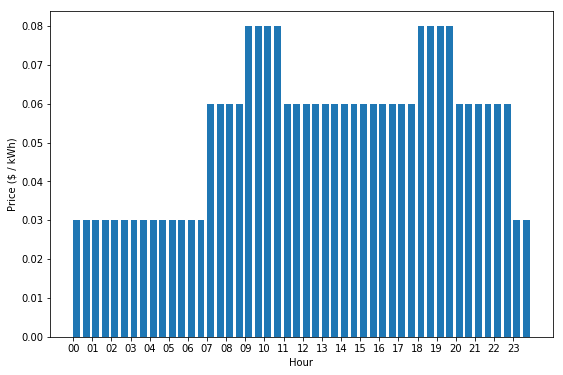

In [53]:
#@title
plt.figure(figsize=(9, 6))
plt.bar(data.index, data['price_SGD_per_kWh'], align='edge', width=0.015)
ax = plt.gca()
drange = pd.date_range(data.index[0], periods=24, freq="h")
ax.set_xticks(drange)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
plt.xlabel('Hour')
_ = plt.ylabel('Price ($ / kWh)')

As we can see in the figure above, the price of the energy varies throughout the day: the value at each time is given in the `data` dataframe in $/kWh.

* Could you calculate how much each of the neighbors would pay for the energy they have consumed this day if they didn't have the solar panels? <br>
Please, encapsulate the calculation in a function and apply it to each of the three neighbors.

* Could you calculate how much each of them will pay for their energy consumption taking into account the solar production?<br>
What are the savings introduced by the solar panels?

# Calculating the economies in the power part of the bill

In fact, our neighbors do not only pay for the energy that they consume, but they also pay for the power that they extract from the electricity grid. 

Each of the neighbors has contracted with the supplier a maximum power. If at some point of the day they extract from the grid a power higher than the contracted one, they will pay some extra money. This extra money will be proportional to the maximum power extracted.

This is the daily price of the power subscription:

In [ ]:
subs_price = 1 # $/kW


And this is the daily price of the penalties:

In [ ]:
penalty_price = 10 # $/kW

All of them have contracted the same power:

In [ ]:
contracted_power = 20 # kW

* Could you calculate how much each of the neighbors would pay if they didn't have the solar panels?

* Could you calculate how much they will pay for the power they have extracted taking into account the solar production? <br>
What are the savings introduced by the solar panels?

# Energy Storage Systems

## Installing a battery

* One of the neighbors has the idea that installing a battery might allow them to make even more savings on their bill. What are some factors to take into account when deciding whether or not to invest in an energy storage system?

## Controlling the battery

Suppose now that an energy storage system is installed for free in the neighborhood via a sustainability grant. What would be the optimal way to use the battery if: 

* The neighbors are allowed to inject excess energy into the grid and are paid a fixed price for what they inject?
* The neighbors are paid the varying price as in Part 5 for what they inject into the grid?

(Note: tell us when to charge and discharge the battery in terms of the time of day and energy price, no need to write an algorithm)

## Charge and Discharge Orders

We have below the charge and discharge orders of a particular battery (charging when 1, discharging when -1, doing nothing when 0). Every half hour, the state of charge of the battery would change by 25% when charging or discharging. The state of charge of the battery at the start of this dataset is 50% (before the first charge at midnight). 

* Plot the state of charge of the battery. 

In [ ]:
battery = pd.read_json(
'{"battery orders":{"1488758400000":1,"1488760200000":0,"1488762000000":0,"1488763800000":0,"1488765600000":-1,"1488767400000":-1,"1488769200000":-1,"1488771000000":0,"1488772800000":0,"1488774600000":0,"1488776400000":1,"1488778200000":1,"1488780000000":1,"1488781800000":1,"1488783600000":0,"1488785400000":0,"1488787200000":0,"1488789000000":-1,"1488790800000":0,"1488792600000":0,"1488794400000":0,"1488796200000":1,"1488798000000":0,"1488799800000":0,"1488801600000":-1,"1488803400000":0,"1488805200000":-1,"1488807000000":-1,"1488808800000":0,"1488810600000":0,"1488812400000":0,"1488814200000":0,"1488816000000":0,"1488817800000":1,"1488819600000":1,"1488821400000":1,"1488823200000":0,"1488825000000":0,"1488826800000":0,"1488828600000":-1,"1488830400000":-1,"1488832200000":1,"1488834000000":-1,"1488835800000":1,"1488837600000":0,"1488839400000":0,"1488841200000":0,"1488843000000":0}}'
)

In [ ]:
battery.head()

**BONUS QUESTION** 
* Given these charge and discharge orders in a list and the starting SOC (as per the two examples below), write a quick function to check if it is a feasible schedule (that is, SOC never exceeds 100% or 0%). 

In [ ]:
init_SOC_1 = 50
orders_1 = list(battery.values.reshape(-1))

In [ ]:
init_SOC_2 = 50
orders_2 = [-1, -1, 0, 0, 1, 1, 1, 1, 
            1, -1, 1, -1, 0, 0, 0, 0,
           -1, -1, -1, -1, 0, 0, 1, 0,
           1, 1, 0, 1, 0, 0, -1, 1, 0]